In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import math

from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")


In [30]:
df = pd.read_csv(r'wish_data_cleaned.csv')
df.head()

,title,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,...,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_picture,product_id,num_listings,tag_list
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,...,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,1,"['Summer', 'Fashion', 'womenunderwearsuit', 'p..."
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,...,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,6,"['Mini', 'womens dresses', 'Summer', 'Patchwor..."
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,...,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,2,"['Summer', 'cardigan', 'women beachwear', 'chi..."
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,...,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,4,"['Summer', 'Shorts', 'Cotton', 'Cotton T Shirt..."
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,...,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,3,"['Summer', 'Plus Size', 'Lace', 'Casual pants'..."


In [31]:
#from markupsafe import escape
#from pandas_profiling import ProfileReport
#eda_report = ProfileReport(df)
#eda_report
#eda_report.to_file(output_file="ecommerce.html")

In [32]:
df.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'rating_five_count',
       'rating_four_count', 'rating_three_count', 'rating_two_count',
       'rating_one_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'origin_country',
       'merchant_title', 'merchant_name', 'merchant_info_subtitle',
       'merchant_rating_count', 'merchant_rating', 'merchant_id',
       'merchant_has_profile_picture', 'product_url', 'product_picture',
       'product_id', 'num_listings', 'tag_list'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1539 non-null   object 
 1   title_orig                    1539 non-null   object 
 2   price                         1539 non-null   float64
 3   retail_price                  1539 non-null   int64  
 4   units_sold                    1539 non-null   int64  
 5   uses_ad_boosts                1539 non-null   int64  
 6   rating                        1539 non-null   float64
 7   rating_count                  1539 non-null   int64  
 8   rating_five_count             1539 non-null   float64
 9   rating_four_count             1539 non-null   float64
 10  rating_three_count            1539 non-null   float64
 11  rating_two_count              1539 non-null   float64
 12  rating_one_count              1539 non-null   float64
 13  bad

In [34]:
df.corr()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,num_listings
price,1.000000,0.305059,-0.029633,-0.077337,0.057234,-0.006073,-0.004790,-0.002425,-0.002425,-0.013271,...,0.272531,0.872815,0.147772,-0.032006,-0.169302,-0.024016,-0.024114,0.045666,0.017536,-0.164080
retail_price,0.305059,1.000000,0.012926,-0.034889,0.027360,0.054632,0.053128,0.061340,0.061340,0.045987,...,0.122293,0.262055,-0.010222,0.039849,-0.003013,-0.011346,0.031054,0.058420,0.032088,-0.137096
units_sold,-0.029633,0.012926,1.000000,-0.020194,0.038371,0.899084,0.876488,0.891348,0.891348,0.867037,...,0.130511,-0.036369,-0.008778,-0.013824,0.006245,-0.028266,0.272282,0.119660,0.141372,0.015398
uses_ad_boosts,-0.077337,-0.034889,-0.020194,1.000000,-0.046994,-0.047968,-0.047391,-0.047721,-0.047721,-0.047441,...,-0.138270,-0.065574,-0.019147,-0.015790,0.043264,0.011260,0.029235,-0.029324,0.003340,0.084217
rating,0.057234,0.027360,0.038371,-0.046994,1.000000,0.053623,0.097563,0.062308,0.062308,-0.025647,...,0.040682,0.072020,0.024563,0.047208,-0.054188,-0.039361,0.033652,0.244574,0.010023,-0.054173
rating_count,-0.006073,0.054632,0.899084,-0.047968,0.053623,1.000000,0.983371,0.995933,0.995933,0.946250,...,0.131005,-0.010887,-0.001591,-0.001803,0.008717,-0.008576,0.257581,0.138841,0.153384,-0.011962
rating_five_count,-0.004790,0.053128,0.876488,-0.047391,0.097563,0.983371,1.000000,0.981241,0.981241,0.873951,...,0.123724,-0.005831,0.005738,-0.001282,0.000372,-0.013125,0.246575,0.160711,0.154750,-0.017236
rating_four_count,-0.002425,0.061340,0.891348,-0.047721,0.062308,0.995933,0.981241,1.000000,1.000000,0.933323,...,0.131895,-0.008817,-0.004880,-0.000774,0.013784,-0.009425,0.251776,0.140758,0.151503,-0.015952
rating_three_count,-0.002425,0.061340,0.891348,-0.047721,0.062308,0.995933,0.981241,1.000000,1.000000,0.933323,...,0.131895,-0.008817,-0.004880,-0.000774,0.013784,-0.009425,0.251776,0.140758,0.151503,-0.015952
rating_two_count,-0.013271,0.045987,0.867037,-0.047441,-0.025647,0.946250,0.873951,0.933323,0.933323,1.000000,...,0.130957,-0.022941,-0.011125,-0.002165,0.018444,0.001482,0.259794,0.090455,0.135943,0.000489


In [35]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,1539,1201,Nouvelle mode d'été femmes robe décontractée c...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title_orig,1539,1203,New Fashion Summer Women Casual Dress Round Ne...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,1539.0,NaN,NaN,NaN,8.356452,3.937161,1.0,5.825,8.0,11.0,49.0
retail_price,1539.0,NaN,NaN,NaN,23.317089,30.309642,1.0,7.0,10.0,26.0,252.0
units_sold,1539.0,NaN,NaN,NaN,4422.480182,9438.316389,1.0,100.0,1000.0,5000.0,100000.0
uses_ad_boosts,1539.0,NaN,NaN,NaN,0.435997,0.496048,0.0,0.0,0.0,1.0,1.0
rating,1539.0,NaN,NaN,NaN,3.82284,0.508619,1.0,3.55,3.85,4.11,5.0
rating_count,1539.0,NaN,NaN,NaN,907.37232,2001.720315,0.0,26.0,161.0,873.0,20744.0
rating_five_count,1539.0,NaN,NaN,NaN,438.144899,977.595368,0.0,11.0,77.0,401.0,11548.0
rating_four_count,1539.0,NaN,NaN,NaN,177.922027,399.443707,0.0,4.5,30.0,167.0,4152.0


In [36]:
def unique_counts(df):
   for i in df.columns:
       count = df[i].nunique()
       print(i, ": ", count)
unique_counts(df)

title :  1201
title_orig :  1203
price :  127
retail_price :  104
units_sold :  15
uses_ad_boosts :  2
rating :  192
rating_count :  761
rating_five_count :  605
rating_four_count :  440
rating_three_count :  440
rating_two_count :  262
rating_one_count :  330
badges_count :  4
badge_local_product :  2
badge_product_quality :  2
badge_fast_shipping :  2
tags :  1230
product_color :  102
product_variation_size_id :  107
product_variation_inventory :  48
shipping_option_price :  8
shipping_is_express :  2
countries_shipped_to :  94
inventory_total :  10
has_urgency_banner :  2
origin_country :  7
merchant_title :  958
merchant_name :  958
merchant_info_subtitle :  1059
merchant_rating_count :  917
merchant_rating :  952
merchant_id :  958
merchant_has_profile_picture :  2
product_url :  1341
product_picture :  1341
product_id :  1341
num_listings :  10
tag_list :  1230


In [116]:
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<h2> Feature Engineering</h2>

Pour extraire plus d'informations à partir des données nous ferons une analyse exploratoire sur chaque colonne

In [38]:
# les colones categorielles

cat_cols=[x for x in df.columns if df[x].dtype=='O']
cat_cols

['title',
 'title_orig',
 'tags',
 'product_color',
 'product_variation_size_id',
 'origin_country',
 'merchant_title',
 'merchant_name',
 'merchant_info_subtitle',
 'merchant_id',
 'product_url',
 'product_picture',
 'product_id',
 'tag_list']

In [39]:
# les colones numeriques
num_cols=[x for x in df.columns if df[x].dtype!='O']
num_cols

['price',
 'retail_price',
 'units_sold',
 'uses_ad_boosts',
 'rating',
 'rating_count',
 'rating_five_count',
 'rating_four_count',
 'rating_three_count',
 'rating_two_count',
 'rating_one_count',
 'badges_count',
 'badge_local_product',
 'badge_product_quality',
 'badge_fast_shipping',
 'product_variation_inventory',
 'shipping_option_price',
 'shipping_is_express',
 'countries_shipped_to',
 'inventory_total',
 'has_urgency_banner',
 'merchant_rating_count',
 'merchant_rating',
 'merchant_has_profile_picture',
 'num_listings']

***<h3>1.title & title_orig</h3>***

In [40]:
df['title_orig'].value_counts()

New Fashion Summer Women Casual Dress Round Neck Loose Big Swing Skirt Sleeveless Soild Color Beach dress          22
Sexy Women's Summer Casual Sleeveless Evening Party Backless Beachwear Mini Dress                                  11
Summer Women Sling Dress V-neck Floral Pleated Strap Casual Pocket Large Dress                                      9
Summer Women s  Fashion  Lace Up Tie Pants  Plus Size Casual High Waist Short Pants                                 9
Fabric Waist Trainer Vest Hot Shaper Summer Shaperwear Slimming Adjustable Sweat Belt Body Shaper                   9
                                                                                                                   ..
Woman's Fashion Shirt short Sleeve Casual V-neck T-shirt Skirt Dress                                                1
Women Two Piece Set Print Wave Striped Sleeveless Tops+Short Skirts Excellent                                       1
Pandolah Hot Women One Piece Bathing Suit Dotted Beachwe

In [41]:
#extraire des informations sur le genre via le titre du produit

df['title_orig'] = df['title_orig'].apply(lambda x: str(x).title())

women_err = []

def prod_gen(tipe):
    for i in df['title_orig']:
        if ('Man' in i) or ('Men' in i) and (i != 'Woman') :
            women_err.append(i)
    if tipe in women_err:
        return 'Men'
    else:
        return 'Woman'
        
df.insert(1, 'prod_gen', df['title_orig'].apply(prod_gen))

df['prod_gen'].value_counts()

Woman    1452
Men        87
Name: prod_gen, dtype: int64

<h3>Q1 : Est-ce que les produits avec des titres traduits sont nettement plus vendus que les produits sans traduction?</h3>

À propos de la différence entre title et title_orig : nous pouvons supposer qu'un produit se vend mieux s'il a une traduction dans la langue préférée du client. Et si un produit est disponible et traduit dans plus de pays et de langues, le marché serait plus vaste. Cela pourrait à son tour conduire à plus de ventes.

In [42]:
title_same = df[df['title'] == df['title_orig']]
title_diff = df[df['title'] != df['title_orig']]

In [55]:
from scipy import stats
stats.ttest_ind(title_same['units_sold'], title_diff['units_sold'])

Ttest_indResult(statistic=-2.3081298201166764, pvalue=0.021124128919168858)

In [56]:
title_same['units_sold'].mean()

1331.875

In [57]:
title_diff['units_sold'].mean()

4521.976525821597

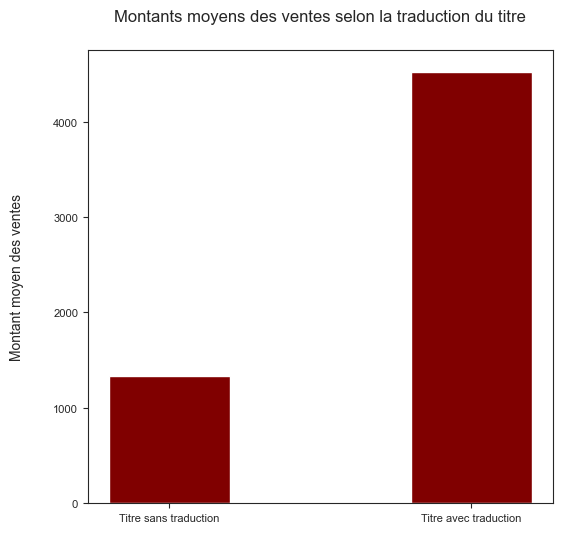

In [58]:
sns.set_style('ticks')
data = {'Titre sans traduction':1331.875, 'Titre avec traduction':4521.97}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 6))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.ylabel("Montant moyen des ventes",labelpad=21)
plt.title("Montants moyens des ventes selon la traduction du titre",pad=21)
plt.show()

Selon les résultats, les produits avec des titres traduits sont nettement plus vendus que les produits sans traduction. La barrière de la langue affecte la quantité de produits vendus. Les produits avec un titre traduit peuvent rassurer le consommateur ou les consommateurs peuvent ignorer les produits sans titre traduit.

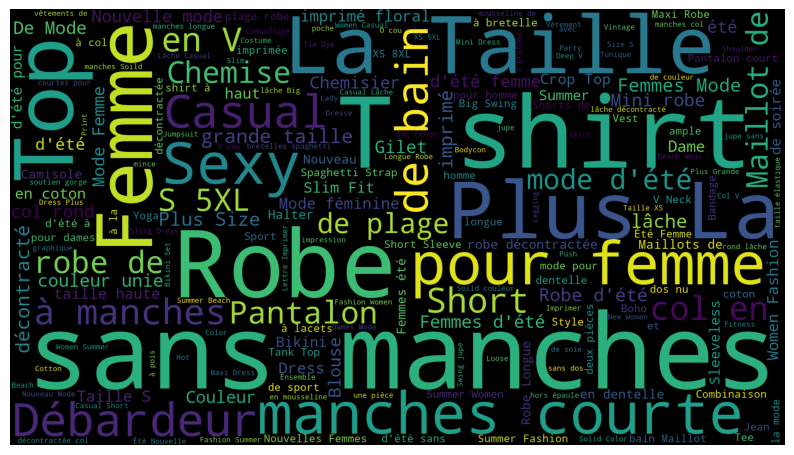

In [69]:
plt.subplots(figsize=(10,25))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()




Nous avons supprimé la colonne shipping option name, mais pour la plupart des marchands, il n'y a pas de traduction en français dans les options d'expédition. Si on analyse la colonne, nous voyons que la majorité des produits vendus ont un nom d'option d'expédition en français. Ainsi, comme dans le cas des titres, la barrière de la langue peut affecter les ventes. 

<h3>Axe d'amelioration_1 :Il serait peut-être préférable d'avoir une option de traduction pour augmenter la satisfaction de l'expérience utilisateur.</h3>

***<h3>2. Price - Retail price</h3>***

<AxesSubplot:xlabel='price', ylabel='units_sold'>

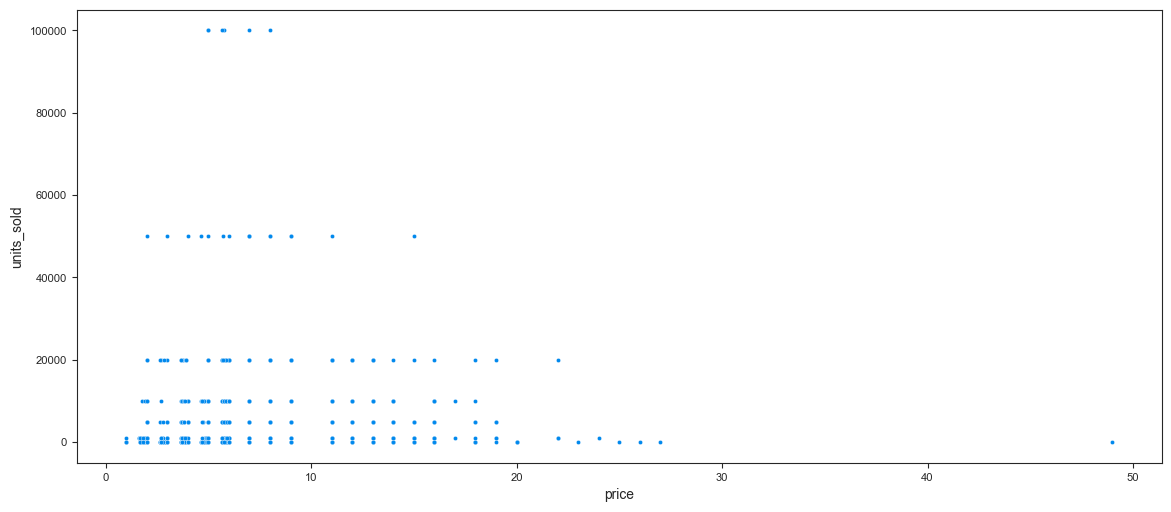

In [115]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df,x="price",y="units_sold")

## les produits entre 1 et 10 euros ont quelques produits avec 100 000 unités vendues et des produits dont le prix est compris entre 10 et 20 euros plafonnement
## à environ 50000 unités vendues
### les produits dont le prix est compris entre 20 et 30 euros plafonnent à 20 000 unités vendues tandis que les produits haut de gamme coûtent un peu moins de 50 euros
## a une unité vendue
## La plus grande variabilité des ventes se situe entre les produits à bas et moyen prix

In [99]:
prix_moyen= df['price'].mean()
prix_moyen

8.356452241715388

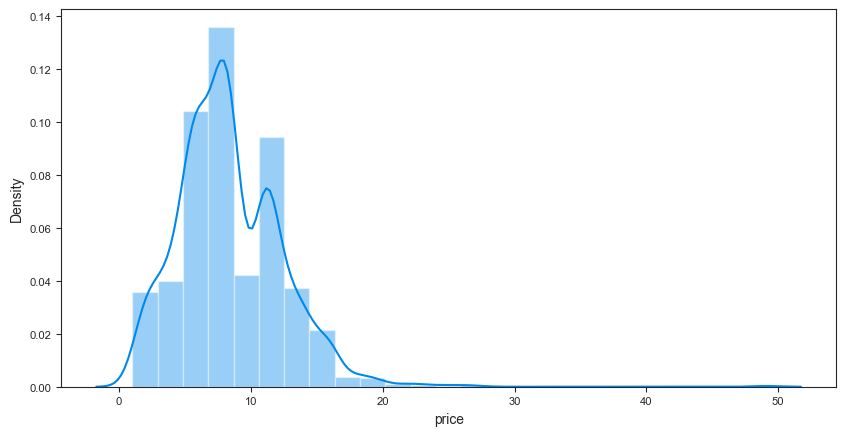

In [101]:
plt.figure(figsize=(10,5))
sns.distplot(df['price'], bins=25)
plt.show()

Le prix moyen des vêtements d'été vendus sur le e-commerce wish est de l'ordre de 7 - 12 euros

In [103]:
#ajouter une colonne de revenus afin d'obtenir de meilleurs résultats d'analyse
df['revenu'] = df['price'] * df['units_sold']

In [112]:
#le produit qui rapporte le plus de revenus(chiffre d'affaires)
df.sort_values(by='revenu', ascending = False).head(10)

,title,prod_gen,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_picture,product_id,num_listings,tag_list,revenu
214,Nouveau Aeeival Femmes Vêtements À Manches Lon...,Woman,New Aeeival Women Clothing Long Sleeve Autumn ...,8.00,7,100000,1,3.76,11062,4663.0,...,108048,4.052504,5417aada4ad3ab27e954b76c,1,https://www.wish.com/c/54bdf18039b8c045f118936a,https://contestimg.wish.com/api/webimage/54bdf...,54bdf18039b8c045f118936a,2,"['roupas femininas', 'womens dresses', 'Lace',...",800000.0
400,Femmes dentelle plage boho maxi robe d'été san...,Woman,Women Lace Beach Boho Maxi Sundress Sleeveless...,15.00,115,50000,1,3.94,6735,3278.0,...,165915,4.256077,53a2a09ad91139519161a267,0,https://www.wish.com/c/563707b0e5be09157176fe80,https://contestimg.wish.com/api/webimage/56370...,563707b0e5be09157176fe80,3,"['bathing suit', 'strapless', 'Lace', 'women d...",750000.0
1006,Femmes dentelle manches courtes hauts hauts ch...,Woman,Women Lace Short Sleeve Long Tops Blouse Shirt...,7.00,22,100000,1,3.82,11913,5355.0,...,320031,4.218866,5357bcf2bb72c5504882e889,1,https://www.wish.com/c/567cb0925ff12c4829f07dfb,https://contestimg.wish.com/api/webimage/567cb...,567cb0925ff12c4829f07dfb,2,"['blouse', 'Fashion', 'Shirt', 'boho', 'Tops',...",700000.0
92,Femmes Camisole extensible Spaghetti Strap Lon...,Woman,Women Stretchy Camisole Spaghetti Strap Long T...,5.77,48,100000,0,4.10,20744,11184.0,...,330405,4.067348,53f2beb39020ee03566d6e18,1,https://www.wish.com/c/544b079d1280fa28eee9b380,https://contestimg.wish.com/api/webimage/544b0...,544b079d1280fa28eee9b380,1,"['Mini', 'Strapless Dress', 'Spaghetti Strap',...",577000.0
1152,Nouvelle arrivée femmes été sexy robe de soiré...,Woman,Women'S Summer Sexy Sleeveless Turtleneck Mini...,5.67,19,100000,0,3.53,18393,6769.0,...,19248,3.889131,570f3a713a698c14278bb51e,0,https://www.wish.com/c/571adeab62cce546f1a46bc0,https://contestimg.wish.com/api/webimage/571ad...,571adeab62cce546f1a46bc0,1,"['slim dress', 'Mini', 'Elegant', 'Dress', 'Mi...",567000.0
1016,Maillots de bain à rayures pour dames avec dou...,Woman,Women'S Striped Double Up Tankini Top,11.00,10,50000,0,3.91,13488,6325.0,...,17816,4.179445,56e43d9e3a698c3826a5feff,1,https://www.wish.com/c/574ff29cb4b28660d9f94d3f,https://contestimg.wish.com/api/webimage/574ff...,574ff29cb4b28660d9f94d3f,3,"['strapless', 'Fashion', 'Tops', 'striped biki...",550000.0
251,T-shirt à manches courtes en mousseline de soi...,Woman,Womens Summer Red White And Blue Chiffon Short...,5.00,33,100000,0,3.98,13789,6862.0,...,366898,4.036081,53082ea15aefb07dfe1f2a4f,0,https://www.wish.com/c/53897eeeafddf70c91af1cda,https://contestimg.wish.com/api/webimage/53897...,53897eeeafddf70c91af1cda,1,"['Summer', 'Plus Size', 'Cotton T Shirt', 'chi...",500000.0
17,2018 New Fashion Women's Tops Sexy Strappy Sle...,Woman,2018 New Fashion Women'S Tops Sexy Strappy Sle...,5.00,25,100000,1,3.83,17980,8290.0,...,139223,3.933581,5708773c3c02161b3f8c7900,0,https://www.wish.com/c/5b07a7c6e997b33c6f9947da,https://contestimg.wish.com/api/webimage/5b07a...,5b07a7c6e997b33c6f9947da,5,"['blouse', 'Plus Size', 'Lace', 'lace top', 'T...",500000.0
40,Sexy Women Casual T-shirt rayé Long Tops Chemi...,Woman,Sexy Women Casual Striped T-Shirt Long Tops Bl...,9.00,81,50000,0,4.26,5359,3111.0,...,59198,4.105054,54bcaabb39b8c00b482a115f,0,https://www.wish.com/c/556fbe8595528719e004fa27,https://contestimg.wish.com/api/webimage/556fb...,556fbe8595528719e004fa27,1,"['blouse', 'Mini', 'Fashion', 'longtop', 'Shir...",450000.0
943,Hot Dernières Sexy Bikini Sexy Bikini Femmes M...,Woman,Hot Latest Sexy Bikini Women Fashion Swimming ...,9.00,8,50000,0,3.83,13198,6060.0,...,37076,4.302082,57e5db02e7f40f131adeeaf8,1,https://www.wish.com/c/5892e3b0da200f71bcec426e,https://contestimg.wish.com/api/webimage/5892e...,5892e3b0da200f71bcec426e,1,"['gatherbracketbikini', 'Panties', 'bea

In [108]:
# le profit
df_profit = df[df['revenu'] > 0].sort_values('revenu', ascending = False)
df_profit

,title,prod_gen,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_picture,product_id,num_listings,tag_list,revenu
214,Nouveau Aeeival Femmes Vêtements À Manches Lon...,Woman,New Aeeival Women Clothing Long Sleeve Autumn ...,8.00,7,100000,1,3.76,11062,4663.0,...,108048,4.052504,5417aada4ad3ab27e954b76c,1,https://www.wish.com/c/54bdf18039b8c045f118936a,https://contestimg.wish.com/api/webimage/54bdf...,54bdf18039b8c045f118936a,2,"['roupas femininas', 'womens dresses', 'Lace',...",800000.00
400,Femmes dentelle plage boho maxi robe d'été san...,Woman,Women Lace Beach Boho Maxi Sundress Sleeveless...,15.00,115,50000,1,3.94,6735,3278.0,...,165915,4.256077,53a2a09ad91139519161a267,0,https://www.wish.com/c/563707b0e5be09157176fe80,https://contestimg.wish.com/api/webimage/56370...,563707b0e5be09157176fe80,3,"['bathing suit', 'strapless', 'Lace', 'women d...",750000.00
1006,Femmes dentelle manches courtes hauts hauts ch...,Woman,Women Lace Short Sleeve Long Tops Blouse Shirt...,7.00,22,100000,1,3.82,11913,5355.0,...,320031,4.218866,5357bcf2bb72c5504882e889,1,https://www.wish.com/c/567cb0925ff12c4829f07dfb,https://contestimg.wish.com/api/webimage/567cb...,567cb0925ff12c4829f07dfb,2,"['blouse', 'Fashion', 'Shirt', 'boho', 'Tops',...",700000.00
92,Femmes Camisole extensible Spaghetti Strap Lon...,Woman,Women Stretchy Camisole Spaghetti Strap Long T...,5.77,48,100000,0,4.10,20744,11184.0,...,330405,4.067348,53f2beb39020ee03566d6e18,1,https://www.wish.com/c/544b079d1280fa28eee9b380,https://contestimg.wish.com/api/webimage/544b0...,544b079d1280fa28eee9b380,1,"['Mini', 'Strapless Dress', 'Spaghetti Strap',...",577000.00
1152,Nouvelle arrivée femmes été sexy robe de soiré...,Woman,Women'S Summer Sexy Sleeveless Turtleneck Mini...,5.67,19,100000,0,3.53,18393,6769.0,...,19248,3.889131,570f3a713a698c14278bb51e,0,https://www.wish.com/c/571adeab62cce546f1a46bc0,https://contestimg.wish.com/api/webimage/571ad...,571adeab62cce546f1a46bc0,1,"['slim dress', 'Mini', 'Elegant', 'Dress', 'Mi...",567000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Nouvelle mode d'été femmes robe décontractée c...,Woman,New Fashion Summer Women Casual Dress Round Ne...,2.00,2,10,0,4.80,5,4.0,...,42,3.666667,5e54d1d9e0d90e6488de48c2,0,https://www.wish.com/c/5eb0c05c8418d0155e62ab7b,https://contestimg.wish.com/api/webimage/5eb0c...,5eb0c05c8418d0155e62ab7b,2,"['Summer', 'Fashion', 'Necks', 'Skirts', 'Dres...",20.00
665,2020 Femmes Mode Col En V Couleur Unie Slim Fi...,Woman,2020 Women Fashion V-Neck Solid Color Slim Fit...,4.81,30,3,0,5.00,0,0.0,...,11378,3.990508,564d8f2f3a698c01d97fbb81,0,https://www.wish.com/c/5eb618659ac3e01e76161a4a,https://contestimg.wish.com/api/webimage/5eb61...,5eb618659ac3e01e76161a4a,1,"['Summer', 'Shorts', 'Slim Fit', 'slim', 'twop...",14.43
1457,Nouvelles femmes d'été mode couleur unie short...,Woman,New Women Summer Fashion Solid Color Shorts Ca...,14.00,14,1,0,5.00,0,0.0,...,1134,3.955908,5add589edb5f1f32114d07df,0,https://www.wish.com/c/5eccb455d4eb5d46b00be0ed,https://contestimg.wish.com/api/webimage/5eccb...,5eccb455d4eb5d46b00be0ed,1,"['Summer', 'Plus Size', 'pants', 'summer short...",14.00
347,Combinaisons décontractées sans manches en cot...,Woman,Women Summer Fashion Cotton Overalls Sleeveles...,11.00,30,1,0,5.00,0,0.0,...,1380,4.007246,5d4b8931933fb13f8a1fe232,0,https://www.wish.com/c/5ebfdd5bebac37702b0b207b,https://contestimg.wish.com/api/webimage/5ebfd...,5ebfdd5bebac37702b0b207b,1,"['Summer', 'Fashion', 'Cotton', 'Casual pants'...",11.00


In [109]:
df_profit['revenu'].describe()

count      1539.000000
mean      35855.804516
std       73247.078996
min           2.720000
25%         800.000000
50%        7000.000000
75%       40000.000000
max      800000.000000
Name: revenu, dtype: float64

cela indique que les produits sont vendus alors qu'un seul produit est vendu?

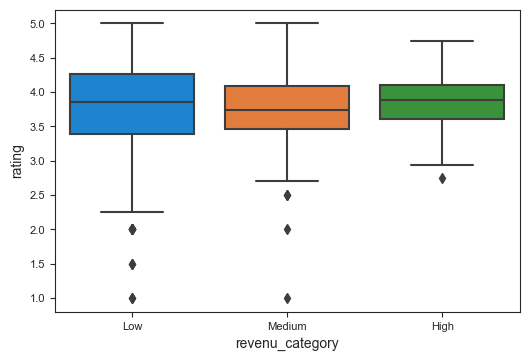

In [111]:
bins = [0,800,7000,40000]
label = ['Low', 'Medium', 'High']

df_profit['revenu_category'] = pd.cut(df_profit.revenu, bins = bins, labels = label)

sns.boxplot(data=df_profit, x='revenu_category', y='rating')
plt.show()

À partir des données sur le chiffre d'affaires :

        1. pour les ventes faibles, nous obtenons une note moyenne entre 3,5 et 4,3

        2. Pour les ventes moyennes, nous obtenons une note moyenne entre 3,5 et 4,0
        
        3. pour les ventes élevées, nous obtenons une note moyenne entre 3,5 et 4,1

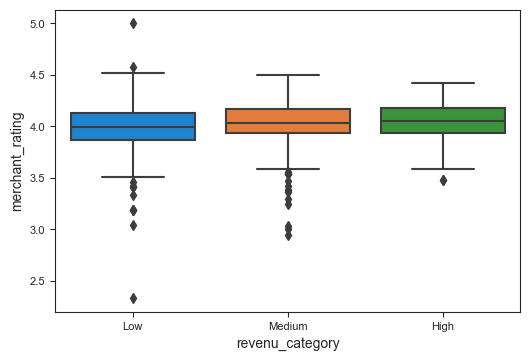

In [114]:
sns.boxplot(data=df_profit, x='revenu_category', y='merchant_rating')
plt.show()

marchand_rating a une valeur moyenne de 3,9 à 4,1

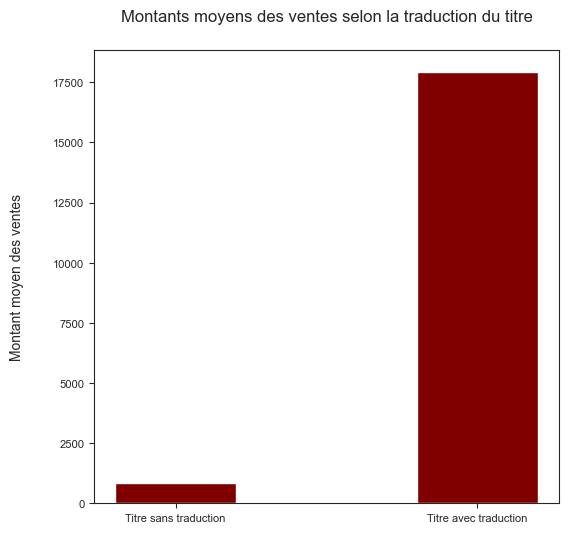

In [ ]:
sns.set_style('ticks')
data = {'Titre sans traduction':827, 'Titre avec traduction':17930}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 6))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.ylabel("Montant moyen des ventes",labelpad=21)
plt.title("Montants moyens des ventes selon la traduction du titre",pad=21)
plt.show()

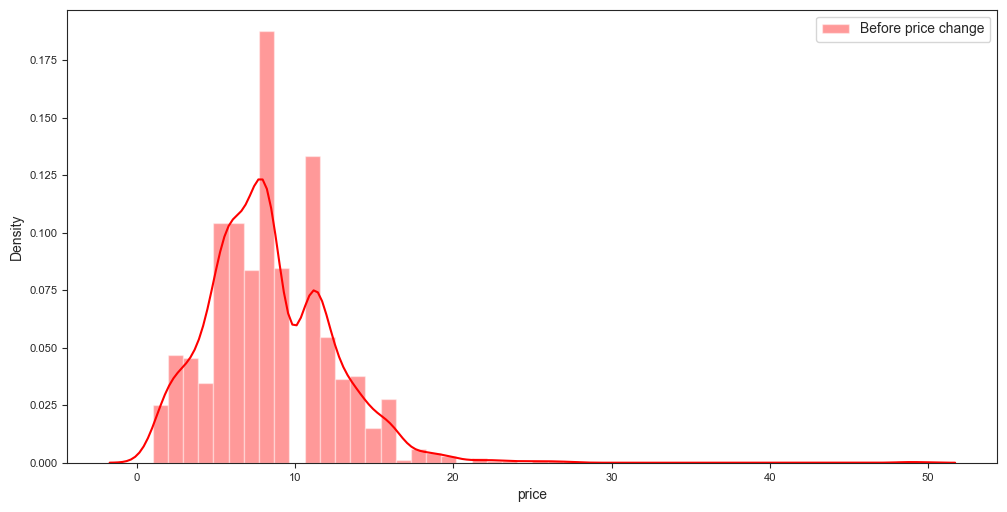

In [84]:
sns.set_style('ticks')
plt.figure(figsize=(12,6))
sns.distplot(df['price'], color='red', label='Before price change')

plt.legend()

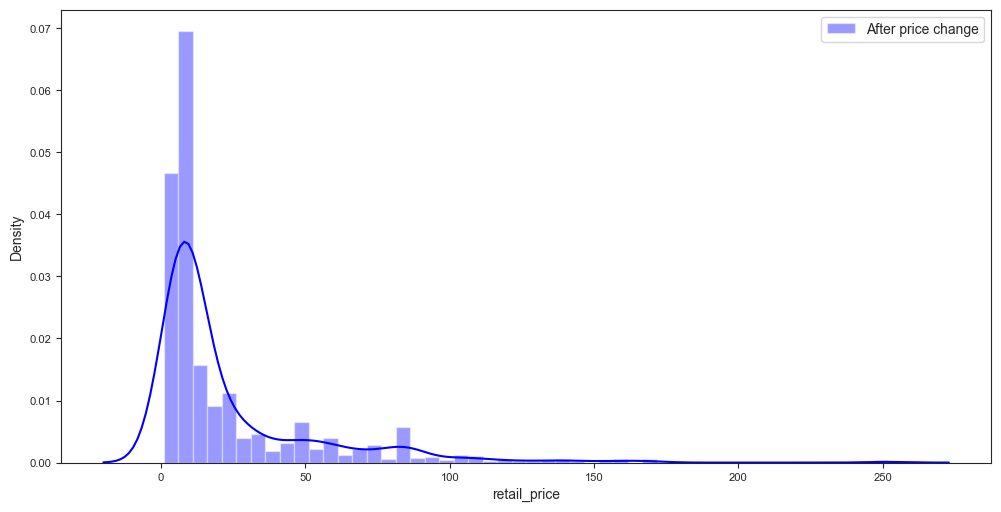

In [82]:
plt.figure(figsize=(12,6))
sns.distplot(df['retail_price'], color='blue', label='After price change')
plt.legend()

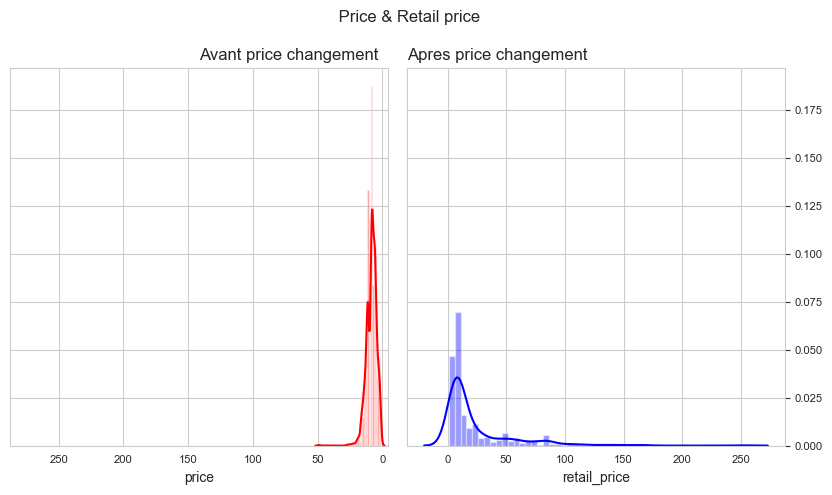

In [95]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5), sharey=True, gridspec_kw={'wspace': 0.05})

  
sns.set_style('ticks')
sns.distplot(df['retail_price'], color='blue',ax=ax2)
ax2.yaxis.set_label_position('right')
ax2.tick_params(axis='y', labelright=True, right=True)
ax2.set_title('Apres price changement'+'  ', loc='left')

# remove the legend; the legend will be in ax3

sns.distplot(df['price'], color='red',ax=ax1)

xmax = max(ax1.get_xlim()[1], ax2.get_xlim()[1])
ax1.set_xlim(xmax=xmax)
ax2.set_xlim(xmax=xmax)

ax1.invert_xaxis()  # reverse the direction
ax1.tick_params(labelleft=False, left=False)
ax1.set_ylabel('')
ax1.set_title('Avant price changement'+'  ', loc='right')


plt.tight_layout()
plt.title(' Price & Retail price', x=0, y=1.1)
plt.show()


Text(0.5, 0, 'Différence entre avant et après changement du prix')

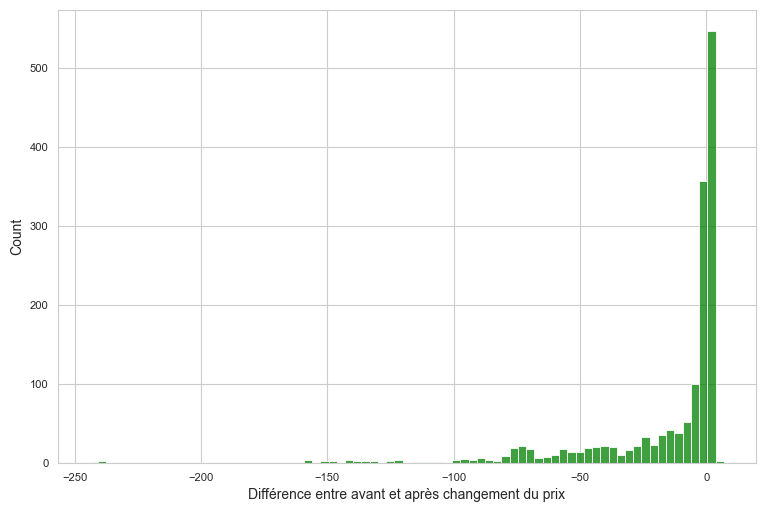

In [94]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,6))
sns.histplot(df['price'] - df['retail_price'], color='green')
plt.xlabel('Différence entre avant et après changement du prix')

In [88]:
price_higher = df[(df['price'] - df['retail_price']) < 0]
len(price_higher)


803

In [89]:
price_lower = df[(df['price'] - df['retail_price']) >= 0]
len(price_lower)

736

Certains prix de vente au détail sont supérieurs au prix normal : pendant la pandémie de COVID, de nombreux vendeurs du monde entier ont décidé d'augmenter leurs prix en raison de la pénurie d'approvisionnement. Étant donné que l'ensemble de données a été récupéré en août 2020 (avec toutes les inquiétudes liées au COVID), peut-être que certains vendeurs soient passés d'un prix régulier précédent A à un prix spécial covid B supérieur au prix A.

In [90]:
stats.ttest_ind(price_higher['units_sold'], price_lower['units_sold'])

Ttest_indResult(statistic=-1.0984482963440523, pvalue=0.27218082136271843)

In [91]:
print(price_higher['units_sold'].mean(), price_lower['units_sold'].mean())

4169.488169364881 4698.502717391304


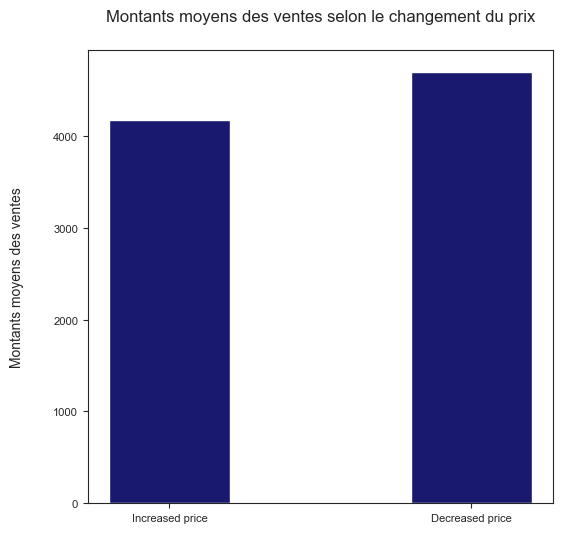

In [93]:
sns.set_style('ticks')
data = {'Increased price':4169.488, 'Decreased price':4698.502}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 6))
 
# creating the bar plot
plt.bar(courses, values, color ='midnightblue',
        width = 0.4)
 
plt.ylabel("Montants moyens des ventes",labelpad=21)
plt.title("Montants moyens des ventes selon le changement du prix", pad=21)
plt.show()

J'ai supposé que les produits qui sont plus élevés qu'avant auraient pu se vendre moins que les produits à prix réduit. Cependant, les résultats indiquent qu'il n'y a pas de différence particulière entre ces deux groupes. C'est peut-être parce que les produits dont les prix augmentent sont essentiels pour une personne et que l'augmentation des prix n'a pas d'incidence sur ses taux de vente. En outre, les commerçants peuvent spécifiquement augmenter les prix des produits plus essentiels, sachant que les consommateurs achèteront de toute façon.